In [1]:
import torch
from torch import nn as nn # for NN
from torch.utils.data import Dataset # class to create dataset class
from torch import optim # Optimizer
from torch.nn import functional as F # activation functions
import matplotlib.pyplot as plt # to plot a graph
import pandas as pd # py data analysis

#Choosing devise to be gpu if have one, else cpu
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
class DataSet(Dataset):

    def __init__(self,path):  
        #transformed csv file into tensor
        self.dataset = torch.tensor(pd.read_csv(path).values)

    def __len__(self):
        #return lenght of dataset
        return len(self.dataset)

    def __getitem__(self, i):
        #returns X and Y data by index
        return self.dataset[i,:-1], self.dataset[i,-1]  

In [3]:
class Net(nn.Module):

    def __init__(self, n_features):
        super().__init__()
        self.n_features = n_features
        
        self.fc1 = nn.Linear(self.n_features,16) 
        self.fc2 = nn.Linear(16,32) 
        self.fc3 = nn.Linear(32,1)        

    def forward(self,x):
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        out = F.sigmoid(self.fc3(out))
        
        return out

In [4]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader, test_loader, print_plot=True):

    train_accuracy = torch.zeros(n_epochs)
    test_accuracy = torch.zeros(n_epochs)

    for epoch in range(n_epochs):

        for example, labels in train_loader:     

            example = example.to(DEVICE)
            labels = labels.to(DEVICE)

            labels  = labels.unsqueeze(1)

            output = model(example.float())
            loss = loss_fn(output, labels.float())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            
        with torch.no_grad():
            
            for loader, accuracy in [(train_loader, train_accuracy),(test_loader, test_accuracy)]:
                correct = 0
                total = 0

                for examples, labels in loader:
                    examples = examples.to(device=DEVICE)
                    labels = labels.to(device=DEVICE).view(-1, 1)

                    outputs = model(examples.float())
                    predicted = torch.round(outputs)

                    total += labels.shape[0]
                    correct += (predicted == labels).sum()

                accuracy[epoch] = correct / total

        if (epoch+1) % 10 ==0:
            print(f'Epoch {epoch+1})', 
                  f'Train Accuracy: {train_accuracy[epoch]}',
                  f'Test Accuracy: {test_accuracy[epoch]}')

    if print_plot:

        epochs = range(n_epochs)

        plt.plot(epochs, train_accuracy, 'g', label='Training accuracy')
        plt.plot(epochs, test_accuracy, 'b', label='Test accuracy')
        plt.title('Training and Test loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

In [5]:
data = DataSet(r'D:\Computer Vision Camp\CVC_CV3\diabetes.csv')

n_sample = len(data)
n_test = int(0.2*n_sample)

train_set, test_set = torch.utils.data.random_split(data, [n_sample-n_test, n_test])

train_loader = torch.utils.data.DataLoader(train_set, batch_size = len(train_set), shuffle = True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = len(test_set), shuffle = True)

c:\users\simple\appdata\local\programs\python\python39\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 10) Train Accuracy: 0.34959349036216736 Test Accuracy: 0.37254902720451355
Epoch 20) Train Accuracy: 0.6585366129875183 Test Accuracy: 0.6339869499206543
Epoch 30) Train Accuracy: 0.6731707453727722 Test Accuracy: 0.6143791079521179
Epoch 40) Train Accuracy: 0.6764227747917175 Test Accuracy: 0.6601307392120361
Epoch 50) Train Accuracy: 0.7170731425285339 Test Accuracy: 0.673202633857727
Epoch 60) Train Accuracy: 0.7317073345184326 Test Accuracy: 0.6797385811805725
Epoch 70) Train Accuracy: 0.7138211131095886 Test Accuracy: 0.673202633857727
Epoch 80) Train Accuracy: 0.7382113933563232 Test Accuracy: 0.673202633857727
Epoch 90) Train Accuracy: 0.7349593639373779 Test Accuracy: 0.673202633857727
Epoch 100) Train Accuracy: 0.7398374080657959 Test Accuracy: 0.686274528503418
Epoch 110) Train Accuracy: 0.7512195110321045 Test Accuracy: 0.6797385811805725
Epoch 120) Train Accuracy: 0.7560975551605225 Test Accuracy: 0.6928104758262634
Epoch 130) Train Accuracy: 0.7658536434173584 Test A

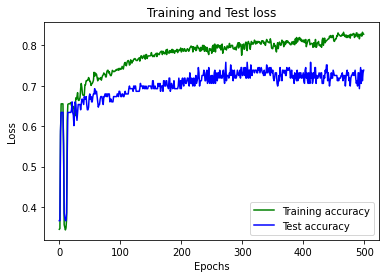

In [6]:
learning_rate = 0.01

model = Net(len(data[0][0])).to(DEVICE)

optimizer = optim.Adam(model.parameters(),lr=learning_rate)

loss_fn = nn.BCELoss()

training_loop(
    n_epochs=500,
    optimizer=optimizer,
    model = model,
    loss_fn = loss_fn,
    print_plot=True,
    train_loader=train_loader,
    test_loader = test_loader
)